# Supervised machine learning - Content list

1. Import libraries and data
2. Visualizations
3. Data prep for regession analysis
4. Regresion analysis

# 1. Import libraries and data

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [6]:
# Import Data
# Create path
path = r'C:\Users\Mathilde\Documents\DATA ANALYSIS CAREERFOUNDRY\Aug 2024 - SNCF project'
# Import the merged data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'dataset_formatted.csv'), index_col = False)

# 2. Visualizations

In [7]:
pd.set_option('display.max_columns', None)
df.head(1)

,Unnamed: 0.1,Unnamed: 0,Date,Service,Departure station,Arrival station,Avg trip length,Number of trips scheduled,Number of trains cancelled,Number of trains delayed on departure,Avg delay of trains delayed on departure,Avg delay of all trains on departure,Number of trains delayed on arrival,Avg delay of trains delayed on arrival,Avg delay of all trains on arrival,Comments delay on arrival,Number of trains >15 min delay,Number of trains >30 min delay,Number of trains >60 min delay,% delay from external causes,% delay infrastructure cause,% delay traffic management cause,% delay rolling stock cause,% delay station management and reutilization of stock,"% delay because of accommodation of passengers (crowd, disability, connections)",Departure region,Arrival region,Departure station: Total travelers 2023,Departure station: Total travelers 2022,Departure station: Total travelers 2021,Departure station: Total travelers 2020,Departure station: Total travelers 2019,Departure station: Total travelers 2018,Arrival station: Total travelers 2023,Arrival station: Total travelers 2022,Arrival station: Total travelers 2021,Arrival station: Total travelers 2020,Arrival station: Total travelers 2019,Arrival station: Total travelers 2018
0,0,0,2018-01,National,Bordeaux Saint-Jean,Paris Montparnasse,141,870,5,289,11.247809,3.693179,147,28.436735,6.511118,NaN,110,44,8,36.134454,31.092437,10.92437,15.966387,5.042017,0.840336,Nouvelle-Aquitaine,Ile-de-France,22612374.0,21353889.0,16454662.0,11184093.0,17675655.0,16080989.0,64471254.0,56862435.0,41039816.0,32447396.0,61374056.0,59174533.0


In [9]:
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])

In [10]:
df.head(1)

,Date,Service,Departure station,Arrival station,Avg trip length,Number of trips scheduled,Number of trains cancelled,Number of trains delayed on departure,Avg delay of trains delayed on departure,Avg delay of all trains on departure,Number of trains delayed on arrival,Avg delay of trains delayed on arrival,Avg delay of all trains on arrival,Comments delay on arrival,Number of trains >15 min delay,Number of trains >30 min delay,Number of trains >60 min delay,% delay from external causes,% delay infrastructure cause,% delay traffic management cause,% delay rolling stock cause,% delay station management and reutilization of stock,"% delay because of accommodation of passengers (crowd, disability, connections)",Departure region,Arrival region,Departure station: Total travelers 2023,Departure station: Total travelers 2022,Departure station: Total travelers 2021,Departure station: Total travelers 2020,Departure station: Total travelers 2019,Departure station: Total travelers 2018,Arrival station: Total travelers 2023,Arrival station: Total travelers 2022,Arrival station: Total travelers 2021,Arrival station: Total travelers 2020,Arrival station: Total travelers 2019,Arrival station: Total travelers 2018
0,2018-01,National,Bordeaux Saint-Jean,Paris Montparnasse,141,870,5,289,11.247809,3.693179,147,28.436735,6.511118,NaN,110,44,8,36.134454,31.092437,10.92437,15.966387,5.042017,0.840336,Nouvelle-Aquitaine,Ile-de-France,22612374.0,21353889.0,16454662.0,11184093.0,17675655.0,16080989.0,64471254.0,56862435.0,41039816.0,32447396.0,61374056.0,59174533.0


When exploring relationships between variables in a previous Notebook, I found the relationship between Nb of trains cancelled and Avg delay of trains delayed on arrival interesting, and I wanted to explore it later on. Let's do it now.

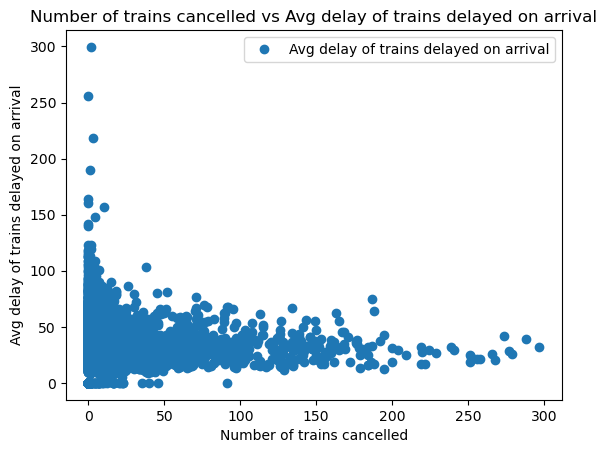

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'Number of trains cancelled', y = 'Avg delay of trains delayed on arrival',style='o')
plt.title('Number of trains cancelled vs Avg delay of trains delayed on arrival')
plt.xlabel('Number of trains cancelled')
plt.ylabel('Avg delay of trains delayed on arrival')
plt.show()

I also want to see the Avg delay on arrival vs number of travelers/year, as it seemed that the busiest stations had a better management, but I'd like to verify this.

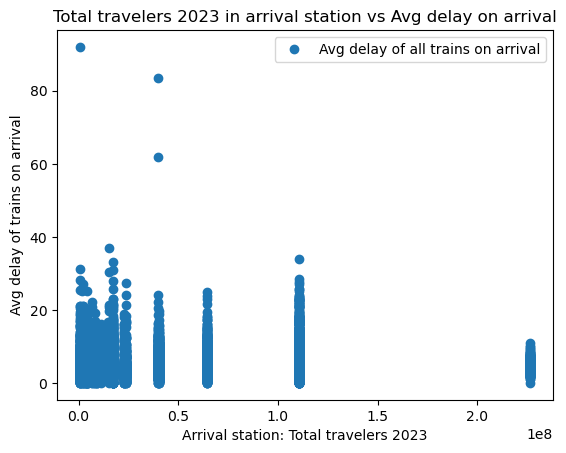

In [12]:
df.plot(x = 'Arrival station: Total travelers 2023', y = 'Avg delay of all trains on arrival',style='o')
plt.title('Total travelers 2023 in arrival station vs Avg delay on arrival')
plt.xlabel('Arrival station: Total travelers 2023')
plt.ylabel('Avg delay of trains on arrival')
plt.show()

### Note:
The "Arrival station : Total travelers 2023" variable takes only a limited number of values, and are sparsely scattered when the number of travelers gets high. It will probably not do for an interesting regression model. I will study the relationship between Nb of trains cancelled and Avg delay of trains delayed on arrival.
### Hypothesis:
The grater number of trains are cancelled on a given line, the smaller the average delay on the line. This would mean that when many trains are cancelled on a connection, the trains that are not cancelled tend to be more on time.

# 3. Data prep for regession analysis

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['Number of trains cancelled'].values.reshape(-1,1)
y = df['Avg delay of trains delayed on arrival'].values.reshape(-1,1)

In [14]:
X

array([[5],
       [0],
       [1],
       ...,
       [8],
       [0],
       [0]], dtype=int64)

In [15]:
y

array([[28.43673469],
       [21.52401961],
       [55.69230769],
       ...,
       [20.75201258],
       [19.41839827],
       [35.89726776]])

In [16]:
X.shape

(9598, 1)

In [17]:
y.shape

(9598, 1)

Note: We have 9,598 observations, which is more than the min of 5,000 requiered to proceed to a regression analysis.

In [18]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [19]:
# Create a regression object
regression = LinearRegression()

In [20]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

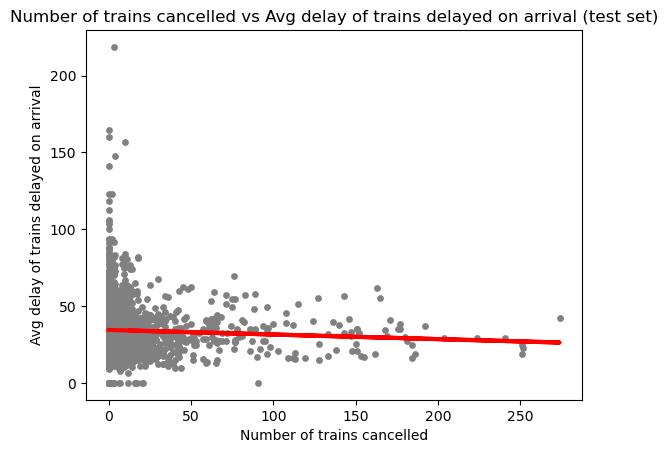

In [22]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of trains cancelled vs Avg delay of trains delayed on arrival (test set)')
plot_test.xlabel('Number of trains cancelled')
plot_test.ylabel('Avg delay of trains delayed on arrival')
plot_test.show()

### Interpretation:
The slope of the regression line is almost 0, the line is almost flat. There is pretty much no linear relationship between those two variables.

In [23]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics to evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.029913]]
Mean squared error:  258.35111743939416
R2 score:  0.00292983624231824


### Interpretation:
The slope is indeed close to 0. The MSE is huge. R2 score is very small. The model created does not fit well.

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,23.272222,34.494651
1,0.000000,33.896390
2,36.005556,34.464738
3,30.963964,33.417782
4,53.919792,34.464738
5,19.221345,34.374999
6,52.159091,34.494651
7,15.350000,34.434825
8,31.969231,34.434825
9,48.981159,34.165607


### Interpretation:
The predictions are very far away from the actual test values. The model is definitely not a good fit.

From the other scatter plots created in previous notebook, there doesn't seem to be any relationship between numerical variables that would be worth being explored. All the numerical variables seem to be independant from eachother - except, maybe, the time variable which hasn't been explored yet.